#### Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import pandas as pd
import os

#### Take NAO Index From Provided Index List

In [2]:
path='/home/pdirmeye/classes/clim680_2022/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)

#### Looking At How Much Time The NAO Index Spans

In [3]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [4]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [5]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [6]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) float32 nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

#### Subsetting Time Of Index For Only One Year (2015)

In [7]:
ds_index_2015= ds_index.sel(time=slice('2015-01-01', '2015-12-31'))
ds_index_2015

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2015-12-01
Data variables:
    nao      (time) float32 1.57 1.05 1.12 0.64 0.19 ... -0.49 0.99 1.7 1.99

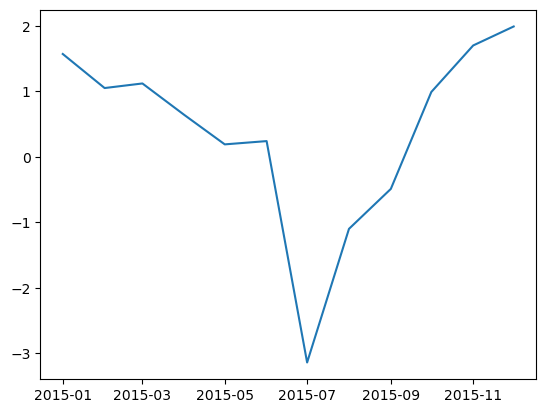

In [8]:
plt.plot(ds_index_2015['time'],ds_index_2015['nao'])

#### Creates Graph That Shows Positive and Negative NAO in 2015

In [9]:
positive = ds_index_2015['nao'].where(ds_index_2015['nao']>0) # nans where false and unaltered where true if only first parameter given
negative = ds_index_2015['nao'].where(ds_index_2015['nao']<0)

In [10]:
print('Positive: ',positive.count(dim='time').values)
print('Negative: ',negative.count(dim='time').values)
counts=[positive.count(dim='time').values,
        negative.count(dim='time').values]
print(counts)

Positive:  9
Negative:  3
[array(9), array(3)]


''

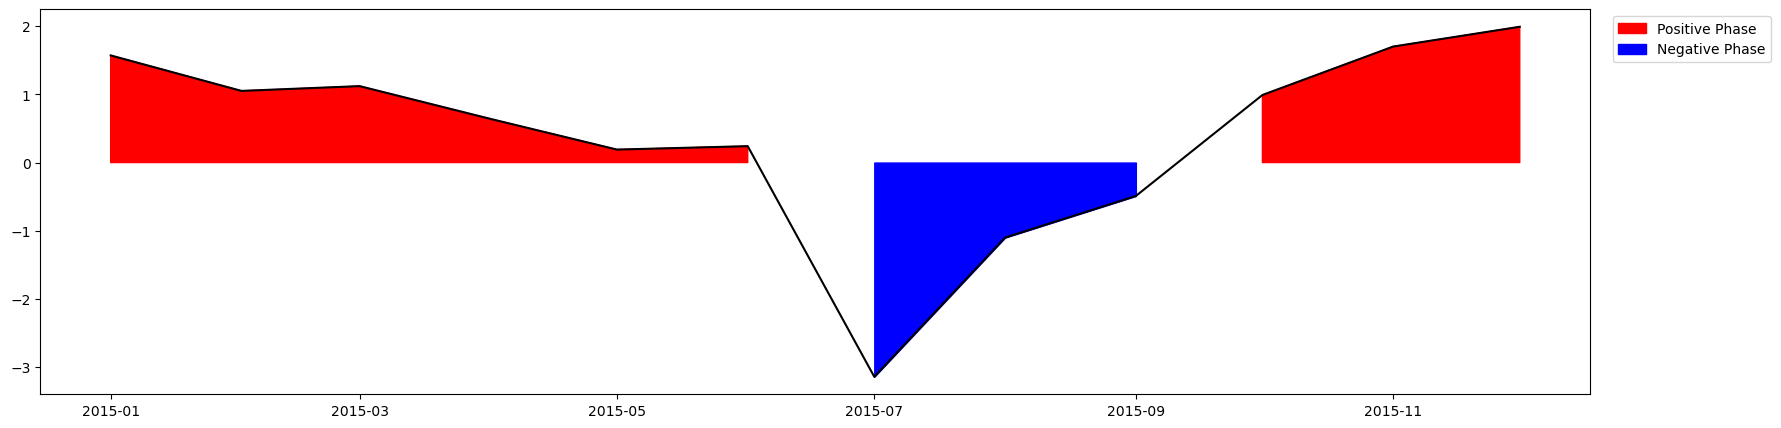

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(ds_index_2015['time'],ds_index_2015['nao'], linestyle= "-", color= "black")
plt.fill_between(ds_index_2015['time'].values,positive,y2=0,color='red', label = "Positive Phase")
plt.fill_between(ds_index_2015['time'].values,negative,y2=0,color='blue', label = "Negative Phase")
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1.0))
;

#### Pull AOT Data to Compare To NAO Index

In [12]:
path = '/scratch/aabramow/dustforclim680/'
fname = 'ds_all_DUEXTTFM.nc'
ds = xr.open_dataset(path+fname)
ds.load()

<xarray.Dataset>
Dimensions:   (lon: 576, lat: 361, time: 8760)
Coordinates:
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time      (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-12-31T23:30:00
Data variables:
    DUEXTTFM  (time, lat, lon) float32 0.001136 0.001136 ... 0.002007 0.002007
Attributes: (12/30)
    History:                           Original file generated: Thu Mar 12 04...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_adg_Nx.20150101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HM00OHQBHKTP
    RangeBeginningDate:                2015-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2015-01-01
    RangeEndingTime:                   23:59:59.000000

In [13]:
ds = ds.DUEXTTFM

In [14]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,0.56,0.01,-0.78,0.65,-0.50,0.25,-1.23,-0.19,0.39,1.43,-1.46,-1.03
1951,-0.42,0.35,-1.47,-0.38,-0.50,-1.35,1.39,-0.41,-1.18,2.54,-0.54,1.13
1952,0.57,-1.38,-1.97,0.95,-0.99,-0.10,-0.06,-0.49,-0.38,-0.28,-1.32,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,-0.37,1.35,0.37,0.26,-0.67,-0.13,-1.72,-2.24,0.74,0.96,-0.31,0.35
2017,0.05,0.69,0.37,1.74,-1.72,0.35,1.28,-1.53,-0.45,0.71,-0.14,0.73
2018,1.17,1.34,-1.38,1.20,2.02,1.41,1.42,2.40,1.78,1.53,-0.25,0.48


#### Calculate Climatology Anomiies and Index Times To Make Composite Data

In [15]:
# Calculate the climatology
ds_climo = ds.groupby('time.month').mean()

# Group the original dataset by month and calculate anomalies
df = ds.groupby('time.month') - ds_climo

df=df.resample(time='MS').mean()
print(df)

# Reindex the positive and negative variables to match df
#positive_reindexed = positive.reindex(time=df['time'])
#negative_reindexed = negative.reindex(time=df['time'])
positive_reindexed = positive.reindex(time=df['time'])
negative_reindexed = negative.reindex(time=df['time'])

#print(positive_reindexed)
#print(negative_reindexed)

# Calculate the means
positive_nao = df.sel(time=positive_reindexed.dropna(dim='time')['time']).mean(dim='time')
negative_nao = df.sel(time=negative_reindexed.dropna(dim='time')['time']).mean(dim='time')
#positive_nao = df.sel(time=positive.dropna(dim='time')['time']).mean(dim='time')
#negative_nao = df.sel(time=negative.dropna(dim='time')['time']).mean(dim='time')

comp_nao = [positive_nao, negative_nao]
comp_nao

<xarray.DataArray 'DUEXTTFM' (time: 12, lat: 361, lon: 576)>
array([[[ 2.02475037e-10,  2.02475037e-10,  2.02475037e-10, ...,
          2.02475037e-10,  2.02475037e-10,  2.02475037e-10],
        [ 2.49260224e-10,  2.36194786e-10,  2.25476443e-10, ...,
          2.17652840e-10,  2.37290104e-10,  2.19217561e-10],
        [ 7.30725203e-11,  8.62161870e-11,  5.52346884e-11, ...,
          9.22403681e-11,  4.34210376e-11,  7.54978371e-11],
        ...,
        [ 1.02645770e-09,  1.39635792e-09,  1.33627265e-09, ...,
          1.13411058e-09,  1.13598819e-09,  1.05587450e-09],
        [ 4.86315599e-10,  9.06912934e-10,  5.54224555e-10, ...,
          8.57780624e-10,  7.26656901e-10,  6.36528941e-10],
        [ 5.99288563e-10,  5.99288563e-10,  5.99288563e-10, ...,
          5.99288563e-10,  5.99288563e-10,  5.99288563e-10]],

       [[ 1.12517488e-10,  1.12517488e-10,  1.12517488e-10, ...,
          1.12517488e-10,  1.12517488e-10,  1.12517488e-10],
        [ 2.20530816e-10,  2.26680730e-10,

[<xarray.DataArray 'DUEXTTFM' (lat: 361, lon: 576)>
 array([[ 1.2430192e-10,  1.2430192e-10,  1.2430192e-10, ...,
          1.2430192e-10,  1.2430192e-10,  1.2430192e-10],
        [ 1.7243384e-10,  1.7280639e-10,  1.6063485e-10, ...,
          1.8884402e-10,  1.9902147e-10,  1.7534510e-10],
        [ 1.4172506e-10,  1.4064282e-10,  1.3791371e-10, ...,
          1.3793236e-10,  1.4050035e-10,  1.4518456e-10],
        ...,
        [ 9.7304970e-11,  9.4935310e-11,  3.0268409e-11, ...,
         -1.4457451e-11,  1.3314935e-12,  1.8208839e-10],
        [-4.1929495e-11,  1.3441503e-10, -1.4878200e-10, ...,
         -3.0084303e-11, -1.1329769e-10,  7.1398503e-12],
        [ 1.9397731e-10,  1.9397731e-10,  1.9397731e-10, ...,
          1.9397731e-10,  1.9397731e-10,  1.9397731e-10]], dtype=float32)
 Coordinates:
   * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
   * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0,
 <xarray.DataArray 'DUEX

#### Determine Min and Max Values To Make Accurate Color Bar

In [16]:
print(positive_nao.min())
print(positive_nao.max())
print(negative_nao.min())
print(negative_nao.max())

<xarray.DataArray 'DUEXTTFM' ()>
array(-1.22904865e-07)
<xarray.DataArray 'DUEXTTFM' ()>
array(1.31269672e-07)
<xarray.DataArray 'DUEXTTFM' ()>
array(-4.39630981e-08)
<xarray.DataArray 'DUEXTTFM' ()>
array(1.26919801e-07)


#### Plotting Composite of Positives and Negatives From 2015 NAO Index and AOT Measurements

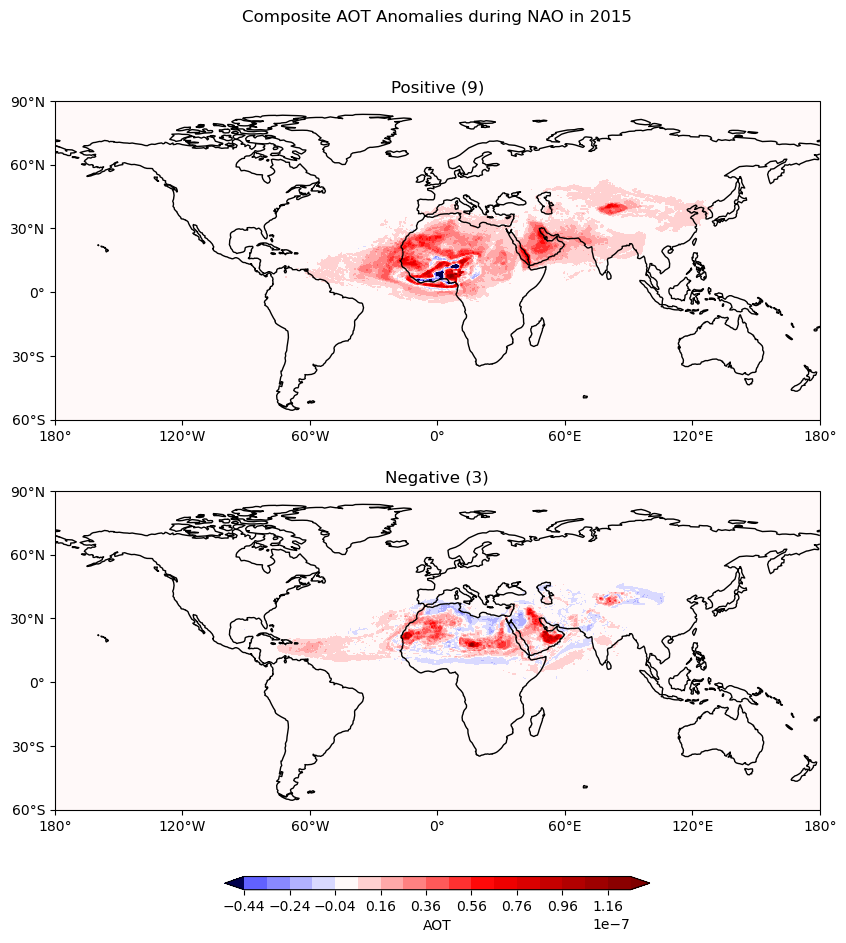

In [17]:
labels=['Positive','Negative']
clevs = np.arange(-4.39630981E-08,1.31269672E-07,1E-8)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_nao):

        # Select the season
        data = comp_nao[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_nao[i]['lon'])
        
        # Contour plot
        cs=axs[i].contourf(lons,comp_nao[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='seismic',extend='both', vmin=-max(abs(clevs)), vmax=max(abs(clevs)))
        
         # Set latitude limits to exclude Antarctica
        axs[i].set_ylim(-60, 90)

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-60,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graphs
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='AOT')


# Add a big title at the top
plt.suptitle('Composite AOT Anomalies during NAO in 2015') ;